In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
MY_BOUNDED_SET = 40000

num_input = 3
num_output = 3

num_hidden1 = 16
num_hidden2 = 16

N_EPOCHS = 5000
epoch = 0
train_rmse_list = []
test_rmse_list = []


In [3]:
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.3)
session = tf.Session(config=tf.ConfigProto(
            allow_soft_placement=True, log_device_placement=True))

In [4]:
x = tf.placeholder(tf.float32, shape=[None, num_input])

y_true = tf.placeholder(tf.float32, shape=[None, num_output], name='y_true')
y_pred = tf.placeholder(tf.float32, shape=[None, num_output])

In [5]:
data_csv = pd.read_csv('../data.csv')
X = data_csv[['in1','in2','in3']]
y = data_csv[['out1','out2','out3']]
#X, y

In [6]:
X_train_pd = X[:MY_BOUNDED_SET]
X_test_pd = X[MY_BOUNDED_SET:]
y_train_pd = y[:MY_BOUNDED_SET]
y_test_pd = y[MY_BOUNDED_SET:]

X_train = X_train_pd.values
X_train = X_train.astype(np.float32)

y_train = y_train_pd.values
y_train = y_train.astype(np.float32)

X_test = X_test_pd.values
X_test = X_test.astype(np.float32)

y_test = y_test_pd.values
y_test = y_test.astype(np.float32)

print (X_train.shape, y_train.shape,X_test.shape,y_test.shape)

(40000, 3) (40000, 3) (12949, 3) (12949, 3)


In [7]:
# Evaluation
#rmse_a = tf.placeholder(tf.float32, [None, 3])
#rmse_b = tf.placeholder(tf.float32, [None, 3])
#rmse = tf.reduce_mean(tf.square(rmse_a - rmse_b))
rmse_a = []
pred_list = []

In [8]:
def cost_func(layer, my_y_true):
    ret = tf.sqrt(tf.reduce_mean(tf.square(layer - my_y_true)))
    #print (layer , my_y_true)
    #ret = tf.reduce_mean(tf.square(layer))
    return ret
            

In [9]:
type(X_train), type(y_train)

(numpy.ndarray, numpy.ndarray)

In [10]:
y_train

array([[ 1.39187e-07,  1.11747e-07, -1.86945e-07],
       [ 4.01196e-06,  3.23639e-06, -5.45397e-06],
       [ 2.49581e-05,  2.02810e-05, -3.48000e-05],
       ...,
       [-9.47092e-01,  6.11797e-02, -3.15031e-01],
       [-9.46749e-01,  5.44199e-02, -3.17297e-01],
       [-9.46361e-01,  4.76586e-02, -3.19532e-01]], dtype=float32)

In [11]:
X_train

array([[0.0827067, 0.740974 , 0.36644  ],
       [0.0827297, 0.740762 , 0.365998 ],
       [0.082753 , 0.74055  , 0.365552 ],
       ...,
       [0.904299 , 0.472788 , 0.346908 ],
       [0.902748 , 0.471081 , 0.340883 ],
       [0.901134 , 0.469546 , 0.334878 ]], dtype=float32)

In [12]:
# Neural Network Structure
inputs = X_train

# Input Layer
input_layer = tf.Variable(inputs)

# Hidden Layer #1
h1 = tf.layers.dense(inputs=input_layer, 
                     units=num_hidden1,
                     use_bias=True,
                     activation=tf.nn.relu)
   
# Hidden Layer #2
h2 = tf.layers.dense(inputs=h1, 
                     units=num_hidden2,
                     use_bias=True,
                     activation=tf.nn.relu)
    
# Output Layer
output_layer = tf.layers.dense(inputs=h2, 
                     units=num_output,
                     use_bias=True,
                     activation=None)


In [13]:
cost = cost_func(output_layer,y_true)
output_layer

<tf.Tensor 'dense_3/BiasAdd:0' shape=(40000, 3) dtype=float32>

In [14]:
optimizer = tf.train.AdamOptimizer(learning_rate=1e-4).minimize(cost)

In [15]:
session.run(tf.global_variables_initializer())

In [16]:
#print (session.run(tf.subtract(output_layer,y_true)).shape)
#print (X_train.shape)

In [17]:
print (y_true.shape)

(?, 3)


In [18]:
def train(N_EPOCHS):
    #global epoch
    global rmse_a
    global pred_list
    #global pred1,pred2,pred3
    for i in range(epoch, epoch + N_EPOCHS):
        feed_dict_train = {x: X_train,
                      y_true: y_train}

        
        session.run(optimizer, feed_dict=feed_dict_train)
        #epoch+=1
        cost_error = session.run(cost,feed_dict=feed_dict_train)
        #print ("[" +str(i+1) +"]")
        print ("Train Accuracy : " , cost_error)
        
        rmse_a += [cost_error]
        #pred_list += [session.run(output_layer,feed_dict=feed_dict_train)]

In [19]:
def predict():
    session.run(tf.global_variables_initializer())
    feed_dict_test = {x: X_test,
                    y_true:y_test}
    print ("Test Accuracy : " , session.run(cost,feed_dict=feed_dict_test))

In [31]:
train(N_EPOCHS)
#predict()
#output_layer

Train Accuracy :  0.0003912003
Train Accuracy :  0.0003915097
Train Accuracy :  0.00039181314
Train Accuracy :  0.00039216
Train Accuracy :  0.00039247973
Train Accuracy :  0.00039269504
Train Accuracy :  0.0003927112
Train Accuracy :  0.00039251408
Train Accuracy :  0.00039216634
Train Accuracy :  0.00039172827
Train Accuracy :  0.00039114838
Train Accuracy :  0.00039050946
Train Accuracy :  0.00038984948
Train Accuracy :  0.00038924805
Train Accuracy :  0.0003886505
Train Accuracy :  0.00038811564
Train Accuracy :  0.00038767813
Train Accuracy :  0.00038741497
Train Accuracy :  0.00038734303
Train Accuracy :  0.00038748787
Train Accuracy :  0.00038792228
Train Accuracy :  0.00038861824
Train Accuracy :  0.00038943728
Train Accuracy :  0.00039022957
Train Accuracy :  0.00039081866
Train Accuracy :  0.00039104253
Train Accuracy :  0.00039084302
Train Accuracy :  0.00039029378
Train Accuracy :  0.00038946772
Train Accuracy :  0.0003885155
Train Accuracy :  0.00038754765
Train Accuracy :

Train Accuracy :  0.0003661517
Train Accuracy :  0.0003662351
Train Accuracy :  0.00036621743
Train Accuracy :  0.00036607072
Train Accuracy :  0.00036581416
Train Accuracy :  0.00036547222
Train Accuracy :  0.00036508442
Train Accuracy :  0.00036464454
Train Accuracy :  0.0003643252
Train Accuracy :  0.000363988
Train Accuracy :  0.00036365227
Train Accuracy :  0.0003633951
Train Accuracy :  0.00036326516
Train Accuracy :  0.00036316487
Train Accuracy :  0.00036319613
Train Accuracy :  0.0003632933
Train Accuracy :  0.00036344054
Train Accuracy :  0.00036359005
Train Accuracy :  0.0003637538
Train Accuracy :  0.00036389614
Train Accuracy :  0.00036398007
Train Accuracy :  0.00036400818
Train Accuracy :  0.0003640448
Train Accuracy :  0.00036406485
Train Accuracy :  0.0003640872
Train Accuracy :  0.00036409585
Train Accuracy :  0.0003641834
Train Accuracy :  0.00036421162
Train Accuracy :  0.00036412448
Train Accuracy :  0.00036381982
Train Accuracy :  0.0003634881
Train Accuracy :  0.

Train Accuracy :  0.00034692866
Train Accuracy :  0.00034692403
Train Accuracy :  0.0003469635
Train Accuracy :  0.0003469848
Train Accuracy :  0.0003471221
Train Accuracy :  0.00034725867
Train Accuracy :  0.00034742028
Train Accuracy :  0.00034756894
Train Accuracy :  0.0003477394
Train Accuracy :  0.00034791743
Train Accuracy :  0.00034802756
Train Accuracy :  0.00034806997
Train Accuracy :  0.00034807494
Train Accuracy :  0.0003479385
Train Accuracy :  0.00034772666
Train Accuracy :  0.00034744898
Train Accuracy :  0.00034709912
Train Accuracy :  0.00034671352
Train Accuracy :  0.000346393
Train Accuracy :  0.00034608596
Train Accuracy :  0.00034581864
Train Accuracy :  0.00034564358
Train Accuracy :  0.00034550898
Train Accuracy :  0.00034541765
Train Accuracy :  0.00034549748
Train Accuracy :  0.00034559646
Train Accuracy :  0.0003457984
Train Accuracy :  0.00034602667
Train Accuracy :  0.00034633104
Train Accuracy :  0.00034660852
Train Accuracy :  0.00034691388
Train Accuracy :

Train Accuracy :  0.00033551565
Train Accuracy :  0.00033569182
Train Accuracy :  0.0003358891
Train Accuracy :  0.00033613286
Train Accuracy :  0.00033633478
Train Accuracy :  0.00033647308
Train Accuracy :  0.00033650402
Train Accuracy :  0.00033644497
Train Accuracy :  0.00033633233
Train Accuracy :  0.0003361731
Train Accuracy :  0.0003360327
Train Accuracy :  0.00033589985
Train Accuracy :  0.00033576632
Train Accuracy :  0.00033557785
Train Accuracy :  0.0003353295
Train Accuracy :  0.0003350384
Train Accuracy :  0.00033476116
Train Accuracy :  0.00033449472
Train Accuracy :  0.0003342433
Train Accuracy :  0.0003341158
Train Accuracy :  0.00033407126
Train Accuracy :  0.00033415272
Train Accuracy :  0.00033431625
Train Accuracy :  0.00033458954
Train Accuracy :  0.00033493293
Train Accuracy :  0.0003353041
Train Accuracy :  0.0003356061
Train Accuracy :  0.0003358544
Train Accuracy :  0.00033593393
Train Accuracy :  0.00033590847
Train Accuracy :  0.00033571656
Train Accuracy :  

Train Accuracy :  0.00032652487
Train Accuracy :  0.0003264097
Train Accuracy :  0.00032622984
Train Accuracy :  0.00032595266
Train Accuracy :  0.00032562032
Train Accuracy :  0.00032531304
Train Accuracy :  0.00032496784
Train Accuracy :  0.00032473344
Train Accuracy :  0.0003246023
Train Accuracy :  0.00032459837
Train Accuracy :  0.0003246627
Train Accuracy :  0.0003248787
Train Accuracy :  0.0003251446
Train Accuracy :  0.0003254532
Train Accuracy :  0.00032567777
Train Accuracy :  0.0003258311
Train Accuracy :  0.00032589296
Train Accuracy :  0.00032588048
Train Accuracy :  0.000325821
Train Accuracy :  0.00032569608
Train Accuracy :  0.0003254709
Train Accuracy :  0.00032528405
Train Accuracy :  0.00032505614
Train Accuracy :  0.00032485393
Train Accuracy :  0.0003246808
Train Accuracy :  0.0003245577
Train Accuracy :  0.00032445343
Train Accuracy :  0.0003243716
Train Accuracy :  0.00032425995
Train Accuracy :  0.00032419176
Train Accuracy :  0.00032412822
Train Accuracy :  0.0

Train Accuracy :  0.00031568803
Train Accuracy :  0.0003158736
Train Accuracy :  0.00031607755
Train Accuracy :  0.00031631402
Train Accuracy :  0.00031659214
Train Accuracy :  0.0003168791
Train Accuracy :  0.0003171165
Train Accuracy :  0.00031724494
Train Accuracy :  0.00031723268
Train Accuracy :  0.00031715265
Train Accuracy :  0.00031696586
Train Accuracy :  0.0003167119
Train Accuracy :  0.00031640264
Train Accuracy :  0.00031602377
Train Accuracy :  0.00031564716
Train Accuracy :  0.0003154272
Train Accuracy :  0.00031526742
Train Accuracy :  0.00031515356
Train Accuracy :  0.00031515947
Train Accuracy :  0.00031522286
Train Accuracy :  0.00031531043
Train Accuracy :  0.0003153812
Train Accuracy :  0.00031545138
Train Accuracy :  0.00031556044
Train Accuracy :  0.00031565514
Train Accuracy :  0.0003157178
Train Accuracy :  0.00031572802
Train Accuracy :  0.00031576576
Train Accuracy :  0.0003158432
Train Accuracy :  0.0003159145
Train Accuracy :  0.00031597042
Train Accuracy : 

Train Accuracy :  0.00030866463
Train Accuracy :  0.00030832045
Train Accuracy :  0.00030797062
Train Accuracy :  0.00030767647
Train Accuracy :  0.00030741264
Train Accuracy :  0.0003071888
Train Accuracy :  0.00030701383
Train Accuracy :  0.0003069508
Train Accuracy :  0.0003068676
Train Accuracy :  0.00030682006
Train Accuracy :  0.0003067926
Train Accuracy :  0.00030679352
Train Accuracy :  0.00030682163
Train Accuracy :  0.00030693156
Train Accuracy :  0.00030707367
Train Accuracy :  0.00030728622
Train Accuracy :  0.00030754926
Train Accuracy :  0.0003077865
Train Accuracy :  0.00030795753
Train Accuracy :  0.0003080421
Train Accuracy :  0.00030799274
Train Accuracy :  0.0003079469
Train Accuracy :  0.0003078346
Train Accuracy :  0.00030766585
Train Accuracy :  0.00030754972
Train Accuracy :  0.00030747234
Train Accuracy :  0.00030732105
Train Accuracy :  0.00030709567
Train Accuracy :  0.0003068097
Train Accuracy :  0.00030651494
Train Accuracy :  0.00030624372
Train Accuracy : 

Train Accuracy :  0.0002992727
Train Accuracy :  0.00029921756
Train Accuracy :  0.00029920056
Train Accuracy :  0.00029926235
Train Accuracy :  0.00029933543
Train Accuracy :  0.000299413
Train Accuracy :  0.0002995215
Train Accuracy :  0.00029966648
Train Accuracy :  0.00029986122
Train Accuracy :  0.00030001355
Train Accuracy :  0.00030003238
Train Accuracy :  0.00030003488
Train Accuracy :  0.0003000945
Train Accuracy :  0.00030008962
Train Accuracy :  0.00030003782
Train Accuracy :  0.00029993372
Train Accuracy :  0.000299751
Train Accuracy :  0.00029958307
Train Accuracy :  0.00029939334
Train Accuracy :  0.00029916174
Train Accuracy :  0.00029893167
Train Accuracy :  0.0002987212
Train Accuracy :  0.00029850783
Train Accuracy :  0.00029836793
Train Accuracy :  0.00029821548
Train Accuracy :  0.0002981318
Train Accuracy :  0.0002981323
Train Accuracy :  0.00029828094
Train Accuracy :  0.00029848522
Train Accuracy :  0.00029873222
Train Accuracy :  0.00029904852
Train Accuracy :  

Train Accuracy :  0.00029259935
Train Accuracy :  0.0002927168
Train Accuracy :  0.0002928241
Train Accuracy :  0.0002929045
Train Accuracy :  0.00029299335
Train Accuracy :  0.0002929992
Train Accuracy :  0.00029293436
Train Accuracy :  0.0002927388
Train Accuracy :  0.00029243334
Train Accuracy :  0.0002921383
Train Accuracy :  0.00029191337
Train Accuracy :  0.0002916763
Train Accuracy :  0.00029151933
Train Accuracy :  0.00029147233
Train Accuracy :  0.00029151372
Train Accuracy :  0.00029156765
Train Accuracy :  0.0002916014
Train Accuracy :  0.00029162533
Train Accuracy :  0.00029169445
Train Accuracy :  0.00029174282
Train Accuracy :  0.00029177655
Train Accuracy :  0.00029188226
Train Accuracy :  0.00029207856
Train Accuracy :  0.00029223366
Train Accuracy :  0.00029233427
Train Accuracy :  0.00029237982
Train Accuracy :  0.00029234585
Train Accuracy :  0.00029216867
Train Accuracy :  0.00029194998
Train Accuracy :  0.00029168083
Train Accuracy :  0.0002913964
Train Accuracy : 

Train Accuracy :  0.00028596024
Train Accuracy :  0.0002857787
Train Accuracy :  0.000285476
Train Accuracy :  0.00028516704
Train Accuracy :  0.00028491288
Train Accuracy :  0.00028467516
Train Accuracy :  0.00028445796
Train Accuracy :  0.0002842523
Train Accuracy :  0.0002841903
Train Accuracy :  0.00028419946
Train Accuracy :  0.00028423755
Train Accuracy :  0.00028432775
Train Accuracy :  0.0002845071
Train Accuracy :  0.00028473054
Train Accuracy :  0.0002850104
Train Accuracy :  0.0002852471
Train Accuracy :  0.00028549533
Train Accuracy :  0.00028570212
Train Accuracy :  0.00028583335
Train Accuracy :  0.0002858531
Train Accuracy :  0.00028579147
Train Accuracy :  0.00028560325
Train Accuracy :  0.0002853491
Train Accuracy :  0.0002850316
Train Accuracy :  0.00028472434
Train Accuracy :  0.00028439963
Train Accuracy :  0.00028412932
Train Accuracy :  0.00028395606
Train Accuracy :  0.00028392032
Train Accuracy :  0.00028389323
Train Accuracy :  0.0002839635
Train Accuracy :  0.

Train Accuracy :  0.00027762842
Train Accuracy :  0.0002775469
Train Accuracy :  0.00027740837
Train Accuracy :  0.00027732123
Train Accuracy :  0.00027734888
Train Accuracy :  0.00027749117
Train Accuracy :  0.00027773812
Train Accuracy :  0.0002781676
Train Accuracy :  0.00027866365
Train Accuracy :  0.00027916412
Train Accuracy :  0.000279568
Train Accuracy :  0.00027977017
Train Accuracy :  0.00027974456
Train Accuracy :  0.00027956403
Train Accuracy :  0.00027926924
Train Accuracy :  0.00027897698
Train Accuracy :  0.00027863943
Train Accuracy :  0.0002782933
Train Accuracy :  0.00027797057
Train Accuracy :  0.00027774175
Train Accuracy :  0.00027757717
Train Accuracy :  0.00027742996
Train Accuracy :  0.0002773089
Train Accuracy :  0.00027727266
Train Accuracy :  0.00027729585
Train Accuracy :  0.0002774072
Train Accuracy :  0.00027756806
Train Accuracy :  0.00027775808
Train Accuracy :  0.000278003
Train Accuracy :  0.00027825
Train Accuracy :  0.00027843605
Train Accuracy :  0.

Train Accuracy :  0.00027273674
Train Accuracy :  0.00027265112
Train Accuracy :  0.00027261616
Train Accuracy :  0.0002725142
Train Accuracy :  0.00027236468
Train Accuracy :  0.00027214424
Train Accuracy :  0.00027196895
Train Accuracy :  0.0002718124
Train Accuracy :  0.00027165443
Train Accuracy :  0.00027151947
Train Accuracy :  0.00027139712
Train Accuracy :  0.0002713021
Train Accuracy :  0.0002713017
Train Accuracy :  0.00027131411
Train Accuracy :  0.00027131356
Train Accuracy :  0.00027130562
Train Accuracy :  0.00027133006
Train Accuracy :  0.00027137157
Train Accuracy :  0.0002714259
Train Accuracy :  0.00027150888
Train Accuracy :  0.000271629
Train Accuracy :  0.00027179244
Train Accuracy :  0.0002719647
Train Accuracy :  0.00027213743
Train Accuracy :  0.00027225466
Train Accuracy :  0.00027225644
Train Accuracy :  0.0002722384
Train Accuracy :  0.00027213915
Train Accuracy :  0.00027198246
Train Accuracy :  0.00027178272
Train Accuracy :  0.00027166767
Train Accuracy : 

Train Accuracy :  0.0002657292
Train Accuracy :  0.00026561096
Train Accuracy :  0.0002655077
Train Accuracy :  0.00026544562
Train Accuracy :  0.00026533686
Train Accuracy :  0.0002653002
Train Accuracy :  0.0002653124
Train Accuracy :  0.00026541486
Train Accuracy :  0.00026548296
Train Accuracy :  0.00026558645
Train Accuracy :  0.00026575002
Train Accuracy :  0.00026595342
Train Accuracy :  0.00026603494
Train Accuracy :  0.0002660513
Train Accuracy :  0.0002660229
Train Accuracy :  0.00026602249
Train Accuracy :  0.00026599562
Train Accuracy :  0.00026594457
Train Accuracy :  0.00026585363
Train Accuracy :  0.0002658258
Train Accuracy :  0.00026572312
Train Accuracy :  0.00026562443
Train Accuracy :  0.0002654333
Train Accuracy :  0.00026521255
Train Accuracy :  0.00026497556
Train Accuracy :  0.00026479745
Train Accuracy :  0.00026468514
Train Accuracy :  0.00026467245
Train Accuracy :  0.00026467495
Train Accuracy :  0.00026470967
Train Accuracy :  0.00026481875
Train Accuracy :

Train Accuracy :  0.00025964197
Train Accuracy :  0.00025957215
Train Accuracy :  0.0002594749
Train Accuracy :  0.00025941047
Train Accuracy :  0.00025940227
Train Accuracy :  0.00025940998
Train Accuracy :  0.00025949764
Train Accuracy :  0.00025967992
Train Accuracy :  0.0002599721
Train Accuracy :  0.00026022043
Train Accuracy :  0.0002603871
Train Accuracy :  0.0002604674
Train Accuracy :  0.00026051272
Train Accuracy :  0.0002604682
Train Accuracy :  0.00026037364
Train Accuracy :  0.00026024703
Train Accuracy :  0.0002601488
Train Accuracy :  0.0002600345
Train Accuracy :  0.00025994153
Train Accuracy :  0.0002597328
Train Accuracy :  0.0002594842
Train Accuracy :  0.00025921664
Train Accuracy :  0.00025904237
Train Accuracy :  0.00025891562
Train Accuracy :  0.00025889577
Train Accuracy :  0.00025901172
Train Accuracy :  0.00025919775
Train Accuracy :  0.00025936085
Train Accuracy :  0.00025943658
Train Accuracy :  0.00025950914
Train Accuracy :  0.00025966344
Train Accuracy : 

Train Accuracy :  0.0002545613
Train Accuracy :  0.00025455447
Train Accuracy :  0.00025457173
Train Accuracy :  0.0002546232
Train Accuracy :  0.00025465005
Train Accuracy :  0.000254593
Train Accuracy :  0.00025448427
Train Accuracy :  0.00025431564
Train Accuracy :  0.0002541102
Train Accuracy :  0.00025387452
Train Accuracy :  0.00025362615
Train Accuracy :  0.00025345528
Train Accuracy :  0.00025338584
Train Accuracy :  0.0002533381
Train Accuracy :  0.00025333854
Train Accuracy :  0.0002533351
Train Accuracy :  0.00025332905
Train Accuracy :  0.00025334646
Train Accuracy :  0.0002534128
Train Accuracy :  0.00025353866
Train Accuracy :  0.00025376485
Train Accuracy :  0.00025403991
Train Accuracy :  0.0002544032
Train Accuracy :  0.00025463832
Train Accuracy :  0.0002547943
Train Accuracy :  0.00025475788
Train Accuracy :  0.00025466483
Train Accuracy :  0.00025443977
Train Accuracy :  0.00025416436
Train Accuracy :  0.00025391232
Train Accuracy :  0.00025371573
Train Accuracy :  

Train Accuracy :  0.00024937387
Train Accuracy :  0.0002493251
Train Accuracy :  0.00024918266
Train Accuracy :  0.00024903694
Train Accuracy :  0.0002488531
Train Accuracy :  0.0002486492
Train Accuracy :  0.0002484558
Train Accuracy :  0.0002482982
Train Accuracy :  0.0002481437
Train Accuracy :  0.0002480077
Train Accuracy :  0.00024786228
Train Accuracy :  0.00024786257
Train Accuracy :  0.00024792395
Train Accuracy :  0.00024802482
Train Accuracy :  0.00024816528
Train Accuracy :  0.0002483418
Train Accuracy :  0.00024851493
Train Accuracy :  0.0002487369
Train Accuracy :  0.00024890943
Train Accuracy :  0.00024907183
Train Accuracy :  0.0002491018
Train Accuracy :  0.0002491337
Train Accuracy :  0.00024908828
Train Accuracy :  0.00024895728
Train Accuracy :  0.00024876866
Train Accuracy :  0.00024853586
Train Accuracy :  0.00024829968
Train Accuracy :  0.00024809755
Train Accuracy :  0.0002479529
Train Accuracy :  0.00024780678
Train Accuracy :  0.00024770957
Train Accuracy :  0.

Train Accuracy :  0.00024357173
Train Accuracy :  0.00024342499
Train Accuracy :  0.00024326697
Train Accuracy :  0.00024306226
Train Accuracy :  0.00024291495
Train Accuracy :  0.0002427799
Train Accuracy :  0.0002427032
Train Accuracy :  0.00024268084
Train Accuracy :  0.00024281717
Train Accuracy :  0.00024294571
Train Accuracy :  0.00024309108
Train Accuracy :  0.00024318964
Train Accuracy :  0.00024329922
Train Accuracy :  0.00024341747
Train Accuracy :  0.00024362127
Train Accuracy :  0.00024376696
Train Accuracy :  0.00024395004
Train Accuracy :  0.00024398135
Train Accuracy :  0.00024383266
Train Accuracy :  0.00024357792
Train Accuracy :  0.0002432773
Train Accuracy :  0.00024304155
Train Accuracy :  0.00024289417
Train Accuracy :  0.00024282662
Train Accuracy :  0.00024276576
Train Accuracy :  0.00024268072
Train Accuracy :  0.00024259153
Train Accuracy :  0.00024250294
Train Accuracy :  0.00024242428
Train Accuracy :  0.00024240019
Train Accuracy :  0.00024242197
Train Accur

Train Accuracy :  0.00023746722
Train Accuracy :  0.00023746736
Train Accuracy :  0.00023752253
Train Accuracy :  0.00023770556
Train Accuracy :  0.0002380258
Train Accuracy :  0.00023841936
Train Accuracy :  0.00023873043
Train Accuracy :  0.00023892176
Train Accuracy :  0.00023891994
Train Accuracy :  0.00023879371
Train Accuracy :  0.00023870253
Train Accuracy :  0.00023856442
Train Accuracy :  0.00023837727
Train Accuracy :  0.00023816692
Train Accuracy :  0.00023794995
Train Accuracy :  0.00023772976
Train Accuracy :  0.00023758641
Train Accuracy :  0.00023743366
Train Accuracy :  0.00023734129
Train Accuracy :  0.00023729021
Train Accuracy :  0.0002372416
Train Accuracy :  0.00023725162
Train Accuracy :  0.00023733004
Train Accuracy :  0.00023744388
Train Accuracy :  0.00023760065
Train Accuracy :  0.00023776847
Train Accuracy :  0.00023788525
Train Accuracy :  0.00023798467
Train Accuracy :  0.0002380761
Train Accuracy :  0.00023810305
Train Accuracy :  0.0002381179
Train Accura

Train Accuracy :  0.00023396288
Train Accuracy :  0.00023384133
Train Accuracy :  0.00023361207
Train Accuracy :  0.00023333087
Train Accuracy :  0.00023306084
Train Accuracy :  0.00023284963
Train Accuracy :  0.00023267553
Train Accuracy :  0.00023250094
Train Accuracy :  0.00023234851
Train Accuracy :  0.00023218528
Train Accuracy :  0.00023205136
Train Accuracy :  0.00023200466
Train Accuracy :  0.00023202394
Train Accuracy :  0.00023215516
Train Accuracy :  0.00023238578
Train Accuracy :  0.00023265502
Train Accuracy :  0.00023286793
Train Accuracy :  0.0002329772


In [21]:
#session.run(optimizer, feed_dict=feed_dict_train)

In [22]:
#print (session.run(output_layer))

In [23]:
#print (session.run(cost))

In [24]:
#print (rmse_a)

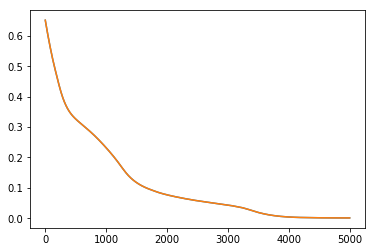

In [25]:
plt.plot(list(enumerate(range(len(rmse_a)))),rmse_a)

In [26]:
#list(enumerate(range(10)))

In [27]:
#print (rmse_a)

In [28]:
print (rmse_a[-1])

0.0011587132


In [29]:
print (pred_list[-1])

IndexError: list index out of range